# Post Process

Note: Don't forget to install the necessary packages with "pip install".

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as io
io.renderers.default='browser'
import folium 
import webbrowser
from geopy import geocoders
import json

## Step 1: Import Scaraped Data from Text

In [3]:
data = pd.read_csv('AllData.txt', delimiter=(';'), header=None, names=['name', 'company', 'university','title', 'location'])

## Step 2: Can it be considered as migration?

Check this and separate the data with migration. (data --> data_migrated)

In [4]:
migration = [None]*data.shape[0]

for i in data.index:
    if 'Türkiye' in data['location'][i]:
        migration[i]=0
        print(f"{i} - {data['name'][i]} --> No Migration")

    elif 'Turkey' in data['location'][i]:
        migration[i]=0
        print(f"{i} - {data['name'][i]} --> No Migration")
        
    else:
        migration[i]=1
        print(f"{i} - {data['name'][i]} --> Migration")

data.insert(5,'migration', migration)
data_migrated = data[(data[['migration']] != 0).all(axis=1)] # drop zeros (no migration) from data, just save migration.

0 - user1 --> No Migration
1 - user2 --> No Migration
2 - user3 --> No Migration
3 - user4 --> No Migration
4 - user5 --> No Migration
5 - user6 --> Migration
6 - user7 --> No Migration
7 - user8 --> Migration
8 - user9 --> Migration
9 - user10 --> Migration
10 - user11 --> No Migration
11 - user12 --> No Migration
12 - user13 --> No Migration
13 - user14 --> Migration
14 - user15 --> No Migration
15 - user16 --> Migration
16 - user17 --> Migration
17 - user18 --> Migration
18 - user19 --> Migration
19 - user20 --> Migration
20 - user21 --> No Migration
21 - user22 --> Migration
22 - user23 --> Migration
23 - user24 --> Migration
24 - user25 --> No Migration
25 - user26 --> Migration
26 - user27 --> Migration
27 - user28 --> Migration
28 - user29 --> No Migration
29 - user30 --> Migration
30 - user31 --> Migration
31 - user32 --> Migration
32 - user33 --> No Migration
33 - user34 --> No Migration
34 - user35 --> Migration
35 - user36 --> Migration
36 - user37 --> Migration
37 - user38 

In [5]:
data_migrated

,name,company,university,title,location,migration
5,user6,Lilium,Başkent Üniversitesi,Senior Systems Engineer,"Munich, Bavyera, Almanya",1
7,user8,Volocopter GmbH,İstanbul Teknik Üniversitesi,Flight Control Law Engineer,"Baden-Württemberg, Almanya",1
8,user9,Collins Aerospace,Orta Doğu Teknik Üniversitesi,Senior Software Engineer - Product Owner,"Heidelberg, Baden-Württemberg, Almanya",1
9,user10,ASML,Orta Doğu Teknik Üniversitesi,Software Engineer,"Eindhoven, Kuzey Brabant, Hollanda",1
13,user14,Lilium,Gazi Üniversitesi,Principal Systems Engineer,"Münih, Bavyera, Almanya",1
...,...,...,...,...,...,...
695,user696,Thales,University of Melbourne,Master of EngMgt,"Melbourne, Victoria, Australia",1
696,user697,ASML,Karadeniz Technical University,System Industrializ,"Nuenen, North Brabant, Netherlands",1
697,user698,ASML,Massachusetts Institute of Technology,Source Architect | Changing the world one nano...,"Eindhoven, North Brabant, Netherlands",1
698,user699,ASML,TOBB Ekonomi ve Teknoloji Üniversitesi,Industrializ,"Eindhoven, North Brabant, Netherlands",1


## Step 3: Handle Some Typos for University Names

In [4]:
data_migrated = data_migrated.replace('Istanbul Technical University','İstanbul Teknik Üniversitesi') # replace with correct
data_migrated = data_migrated.replace('Orta Doğu Teknik Üniversitesi ','Orta Doğu Teknik Üniversitesi') # replace with correct
data_migrated = data_migrated.replace('Middle East Technical University','Orta Doğu Teknik Üniversitesi') # replace with correct
data_migrated = data_migrated.replace('Middle East Technical Univesity','Orta Doğu Teknik Üniversitesi') # replace with correct
data_migrated = data_migrated.replace('Gazi University','Gazi Üniversitesi') # replace with correct
data_migrated = data_migrated.replace('Yildiz Technical University','Yıldız Teknik Üniversitesi') # replace with correct
data_migrated = data_migrated.replace('Yıldız Teknik Üniversitesi ','Yıldız Teknik Üniversitesi') # replace with correct

## Step 4: Some Statistical Information Interpreted from the Data

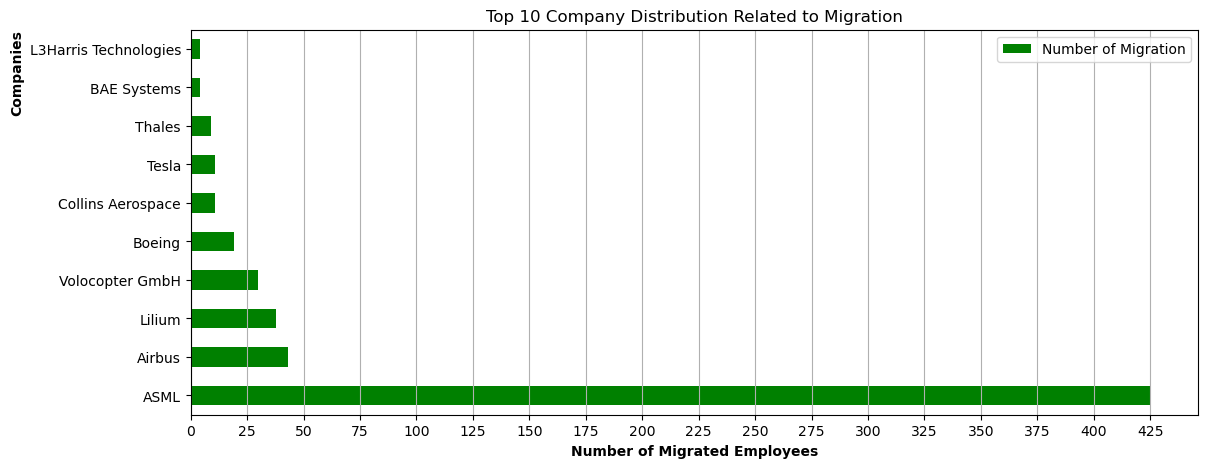

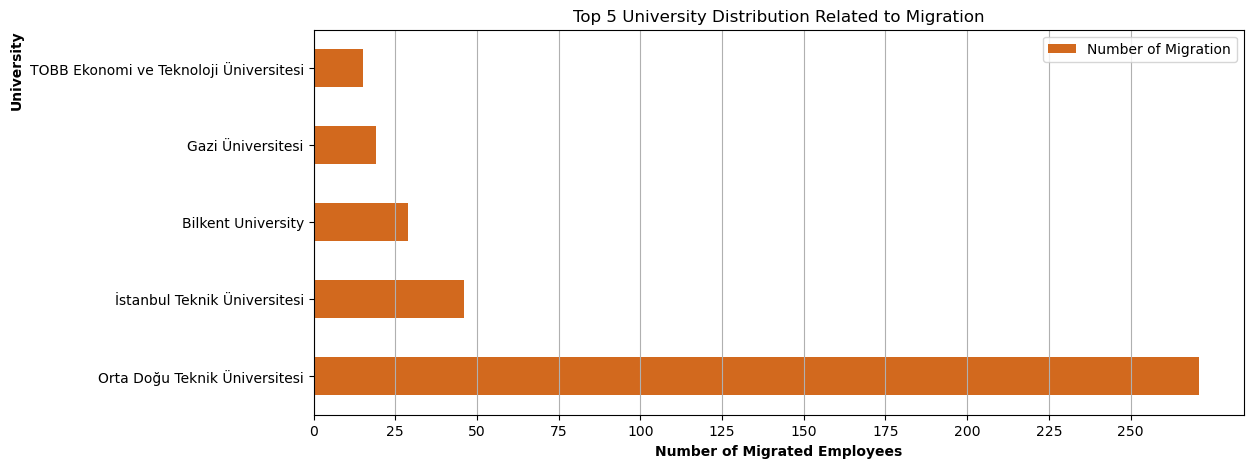

In [5]:
company_counted_sorted = data_migrated.groupby(['company']).sum().sort_values(by='migration', ascending=False)

####################################################
company_counted_sorted['migration'].head(10).plot(kind="barh",figsize=(13, 5),color='green',label='Number of Migration')
plt.title("Top 10 Company Distribution Related to Migration")
plt.legend()
plt.ylabel("Companies",loc="top",fontweight='bold')
plt.xlabel("Number of Migrated Employees",fontweight='bold')
plt.xticks(ticks=range(0,450,25))
plt.grid(True,axis='x')
plt.show()
####################################################


university_counted_sorted = data_migrated.groupby(['university']).sum().sort_values(by='migration', ascending=False)

####################################################
university_counted_sorted['migration'].head(5).plot(kind="barh",figsize=(12, 5),color='chocolate',label='Number of Migration')
plt.title("Top 5 University Distribution Related to Migration")
plt.legend()
plt.ylabel("University",loc="top",fontweight='bold')
plt.xlabel("Number of Migrated Employees",fontweight='bold')
plt.xticks(ticks=range(0,275,25))
plt.grid(True,axis='x')
plt.show()
####################################################

## Step 5: Extracting City/State/Country from "location" Information

In [6]:
city = [None]*data_migrated.shape[0]
state = [None]*data_migrated.shape[0]
country = [None]*data_migrated.shape[0]

counter=0

for i in data_migrated.index:
    loc_split = data_migrated.location[i].split(",")
    
    if len(loc_split)==3:
        city[counter]=loc_split[0].strip()
        state[counter]=loc_split[1].strip()
        country[counter]=loc_split[2].strip()
        
    elif len(loc_split)==2:
        city[counter]=loc_split[0].strip()
        state[counter]="None"
        country[counter]=loc_split[1].strip()
        
    elif len(loc_split)==1:
        if "Bölgesi" in loc_split[0]:
            city[counter]="None"
            state[counter]=loc_split[0].strip()
            country[counter]="None"
        
        else:
            city[counter]="None"
            state[counter]="None"
            country[counter]=loc_split[0].strip()
        
    else:
        city[counter]="None"
        state[counter]="None"
        country[counter]="None"
    
    counter+=1

data_migrated.insert(6,'city', city)
data_migrated.insert(7,'state', state)
data_migrated.insert(8,'country', country)

## Step 6: Coordinates and Geospatial Analysis

In [ ]:
location_latitude = [None]*data_migrated.shape[0]
location_longitude = [None]*data_migrated.shape[0]
data_migrated.insert(9,'location_latitude', location_latitude)
data_migrated.insert(10,'location_longitude', location_longitude)

# Coordinates #

####################################################
geolocator  = geocoders.Nominatim(user_agent='myapplication')

for i in data_migrated.index:
    
    if geolocator.geocode(data_migrated.location[i]) != None:
        data_migrated.location_latitude[i] = geolocator.geocode(data_migrated.location[i]).latitude
        data_migrated.location_longitude[i] = geolocator.geocode(data_migrated.location[i]).longitude
    
    elif geolocator.geocode(data_migrated.city[i]) != None:
        data_migrated.location_latitude[i] = geolocator.geocode(data_migrated.city[i]).latitude
        data_migrated.location_longitude[i] = geolocator.geocode(data_migrated.city[i]).longitude
    
    else:
        print('City or Country not found!')
        continue
####################################################

# Map Creation #

####################################################
map = folium.Map(location=[30,10],zoom_start=3)


for i in data_migrated.index: # try for [range(500)] --> 500 --> just for demonstration (also max request number to use geolocator service)
    folium.Marker(location=[data_migrated.location_latitude[i],data_migrated.location_longitude[i]], popup = data_migrated.location[i]).add_to(map)
   
with open('world-countries.json') as handle:
    country_geo = json.loads(handle.read())

for i in country_geo['features']:
    if i['properties']['name'] == 'Turkey':
        country = i
        break

folium.GeoJson(country,name='Turkey',style_function=lambda x: {'color':'red','opacity':0.50,'weight':'2','dashArray' : '3, 6'}).add_to(map)

folium.TileLayer('openstreetmap').add_to(map)
folium.TileLayer('stamenwatercolor').add_to(map)
folium.LayerControl().add_to(map)
    
map.save("migration_map.html")
webbrowser.open_new_tab("migration_density_map.html")
####################################################